<a href="https://colab.research.google.com/github/magentmagent/eraTHYMKR/blob/master/Big_Sleep_Tweaked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BEFORE RUNNING: Go to File > Save a copy in Drive to save a copy in your drive

---



# Run this first

In [3]:
!pip install big-sleep --upgrade

Requirement already up-to-date: big-sleep in /usr/local/lib/python3.7/dist-packages (0.8.5)


# Generate images
Enter your prompt in the "Text" field to the right of the code box below.

You can supply it with multiple phrases at once using backslashes to seperate them to attempt to further specify what the image should be, e.g:

```
an armchair in the form of pikachu\an armchair imitating pikachu\abstract
```

The model will train for 20 epochs. Running the entire course is not recommended because it'll take a very very long time and Colab will probably time you out. On average there's a coherent and decent output before the end of the first epoch but you can go for longer if you want.

To stop a run, you might need to click the "stop" button 3 times which will have Colab prompt you to reset the runtime.


---


Parameters:

TEXT - This is the prompt you want the AI to use to generate your image. It's ideal to use something descriptive but not a requirement.

SAVE_EVERY - Default: 100 - How often the output image will be saved and displayed.

SAVE_PROGRESS - Default: False - Saves the output so that it can be resumed



LEARNING_RATE - Default: 8e-2 - Affects how much compensation there is for approximated errors. Values too low can result in the output not resembling the prompt at all (especially for more obscure prompts) or stagnating and barely changing, values too high can result in the output being too wild or can result in a feedback loop where the image completely breaks down.

It's often easier for the AI to figure out more obscure or weird prompts with a higher learning rate (often, at low learning rates the AI will commonly output images of animals for more obscure prompts.) but raising the learning rate often leads to less stability.

This value takes a lot of work to fine-tune. I usually set it to something higher. 2e-1 (0.2) can result in some great output but it's common to see the images break down with such a high value. 8e-2 (0.08) is probably a decent balance. Play around for yourself. Different prompts work better with different learning rates.



iteration:  60%|██████    | 600/1000 [05:45<04:34,  1.46it/s]

image updated at "./female.png"


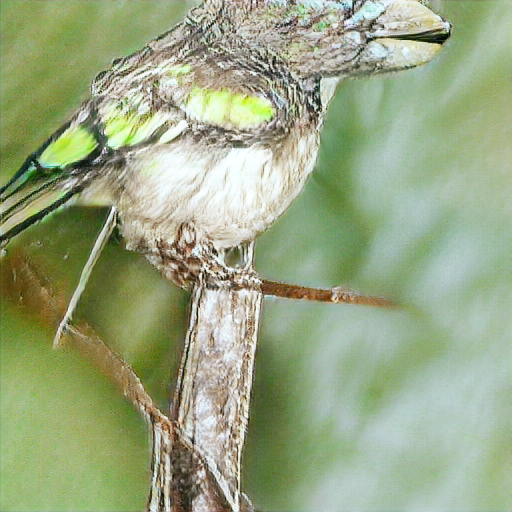


iteration:  70%|███████   | 700/1000 [06:43<03:26,  1.45it/s]

image updated at "./female.png"


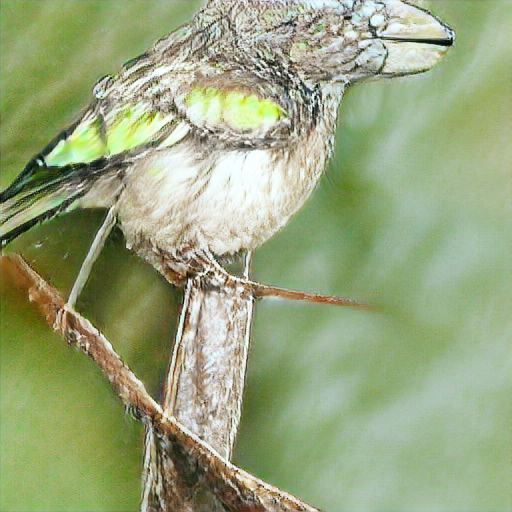


iteration:  80%|████████  | 800/1000 [07:41<02:17,  1.45it/s]

image updated at "./female.png"


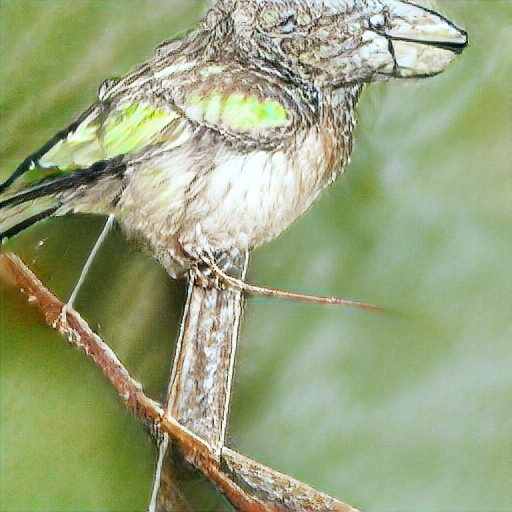


iteration:  81%|████████  | 812/1000 [07:48<01:48,  1.73it/s]

In [ ]:
from tqdm import trange
import string
from IPython.display import Image, display

from big_sleep import Imagine

TEXT = 'female' #@param {type:"string"}

#Default: 100
SAVE_EVERY = 100 #@param {type:"number"} 

#Default: False
SAVE_PROGRESS = False #@param {type:"boolean"}

#Default: False
#EXPERIMENTAL_RESAMPLE = False #@param {type:"boolean"}

#Default: 5e-2
LEARNING_RATE = 8e-2 #@param {type:"number"}

#Default: 1050
ITERATIONS = 1050 #@param {type:"number"} 

model = Imagine(
    text = TEXT,
    save_every = SAVE_EVERY,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS,
    #experimental_resample = EXPERIMENTAL_RESAMPLE
)

for epoch in trange(20, desc = 'epochs'):
    for i in trange(1000, desc = 'iteration'):
        model.train_step(epoch, i)

        if i == 0 or i % model.save_every != 0:
            continue

        filename = TEXT.translate(str.maketrans('', '', string.punctuation)).replace(' ', '_')
        image = Image(f'./{filename}.png')
        display(image)